In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflecting an existing database into a new model
Base = automap_base()
# reflecting the tables
Base.prepare(engine, reflect=True)

In [7]:
#view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Saving references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Creating session (link) from Python to the DB
session = Session(engine)

In [10]:
Measurement

sqlalchemy.ext.automap.measurement

In [11]:
#Using Inspector to find the name of columns of table 'Measurement'
inspector = inspect(engine)
inspector.get_columns('Measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [12]:
#Using Inspector to find the name of columns of table 'Station'
inspector.get_columns('Station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
#Checking last date with available information 
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date

('2017-08-23')

In [15]:
#Retrieving infromation of precipitation data
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23'))

In [16]:
#Creating DataFrame
df = pd.DataFrame(prcp[:], columns=['date','prcp'])
df = df.sort_values('date', ascending = True) #sorting values
df = df.set_index('date') #setting index
df = df.dropna() # dropping zero values
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


In [17]:
#ax = df_grouped.plot.bar()
#ax.set_xticks([])
#plt.show()

In [18]:
# Unpacking the `date` and `prcp` from results and saving them into separate lists
p_date = [p[0] for p in prcp]
p_prcp = [p[1] for p in prcp]

![precipitation](Images/precipitation.png)

In [19]:
# Calculating the summary statistics for the precipitation data
stat = session.query(Measurement.prcp).all()
stat_df = pd.DataFrame(stat[:], columns=['precipitation'])
stat_df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [20]:
# Designing a query to show how many stations are available in this dataset
count = session.query(Measurement.station).group_by(Measurement.station).count()
print(f' This dataset provides infromation from {count} weather stations.')

 This dataset provides infromation from 9 weather stations.


In [21]:
#Displaying most active stations 
station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
#Displaying lowest, highest and average temperature for most active station by using Station ID.
temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").all()
temp

[(54.0, 85.0, 71.66378066378067)]

In [23]:
#Retrieving temperature information of the station with the highest number 
#of temperature observations for 1 year period 
obs = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.station == "USC00519281").\
filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()

In [24]:
#Creating DataFrame
tobsdf = pd.DataFrame(obs[:], columns=['station','tobs'])
tobsdf.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


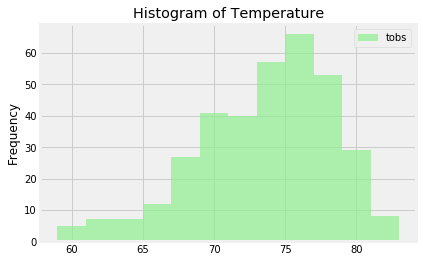

In [25]:
#Displaying the result as Histogram
plt.hist(tobsdf['tobs'], bins=12, color = "lightgreen", alpha = 0.7)
plt.title("Histogram of Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'])

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [27]:
#calculatin the tmin, tavg, and tmax for period from 2017-02-10 to 2017-02-17
mytrip = calc_temps('2017-02-10', '2017-02-17')
mytrip

[(62.0, 71.75, 80.0)]

Text(0,0.5,'Temperature (F)')

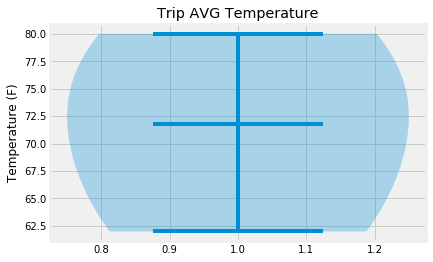

In [28]:
plt.violinplot(mytrip, showmeans=False,
                   showmedians=True)
plt.title("Trip AVG Temperature")
plt.ylabel("Temperature (F)")

In [30]:
# Calculating rainfall per weather station and Creating DataFrame 
datasum = [Measurement.station, Station.name, 
        func.sum(Measurement.prcp).label("rainfall"), 
        Station.elevation, Station.latitude, Station.longitude]

mytrip_sum = session.query(*datasum).filter(Measurement.station == Station.station).\
               filter(Measurement.date.between('2017-02-10', '2017-02-17')).\
                      group_by(Measurement.station).\
                      order_by(func.sum(Measurement.prcp).desc()).all()
mytrip_df = pd.DataFrame(mytrip_sum)
mytrip_df

,station,name,rainfall,elevation,latitude,longitude
0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",5.84,19.5,21.33556,-157.71139
1,USC00513117,"KANEOHE 838.1, HI US",5.77,14.6,21.42340,-157.80150
2,USC00519281,"WAIHEE 837.5, HI US",5.59,32.9,21.45167,-157.84889
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",4.98,7.0,21.52130,-157.83740
4,USC00519397,"WAIKIKI 717.2, HI US",3.01,3.0,21.27160,-157.81680
5,USC00516128,"MANOA LYON ARBO 785.2, HI US",2.77,152.4,21.33310,-157.80250
6,USC00517948,"PEARL CITY, HI US",0.00,11.9,21.39340,-157.97510


## Optional Challenge Assignment

In [77]:
# Create a query that will calculate the daily normals 

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()


In [76]:
#Retrieving date information for my trip period
day = session.query(Measurement.date).\
               filter(Measurement.date.between('2017-02-10', '2017-02-17')).\
                filter(Measurement.station == 'USC00519523').all()

In [75]:
#Storing information as a list
date = [date[0] for date in day]
date

['2017-02-10',
 '2017-02-11',
 '2017-02-12',
 '2017-02-13',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17']

In [74]:
#Storing information as a list of %m-%d strings
month_day = [date[5:10] for date in date]
month_day

['02-10', '02-11', '02-12', '02-13', '02-15', '02-16', '02-17']

In [36]:
# Loop through the list of %m-%d strings and calculate the normals for each date
day_list_find = [daily_normals(each) for each in month_day]
day_list = [date[0] for date in day_list_find]
day_list

[(56.0, 68.41666666666667, 76.0),
 (61.0, 69.25, 79.0),
 (60.0, 69.15789473684211, 78.0),
 (58.0, 70.36206896551724, 80.0),
 (56.0, 70.28813559322033, 79.0),
 (59.0, 70.48214285714286, 76.0),
 (62.0, 70.47272727272727, 77.0)]

In [37]:
# Loading the  query results into a Pandas DataFrame
day_list_df = pd.DataFrame(day_list, columns = ["tmin", "tavg", "tmax"])

# adding the column 'date' and setting columnd as index
day_list_df['date'] = pd.Series(date)
day_list_df.set_index('date')

,tmin,tavg,tmax
date,,,
2017-02-10,56.0,68.416667,76.0
2017-02-11,61.0,69.250000,79.0
2017-02-12,60.0,69.157895,78.0
2017-02-13,58.0,70.362069,80.0
2017-02-15,56.0,70.288136,79.0
2017-02-16,59.0,70.482143,76.0
2017-02-17,62.0,70.472727,77.0


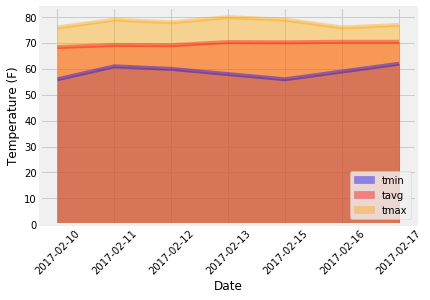

In [68]:
#Displaying an area plot for the daily normals.
pal = ["blue", "red", "orange"]
x = np.arange(0,len(day_list_df))
day_list_df.plot.area( stacked = False, color=pal,alpha=0.4)
plt.legend(loc='lower right')
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.xticks(x, date, rotation = 45)
plt.show()
